# sage-flatsurf: Flat surfaces in Sage

The goal is to explain some things about the `sage-flatsurf` package. This is a project that I started together with [Vincent Delecroix](https://www.labri.fr/perso/vdelecro/). Currently most of the work is being done by Vincent Delecroix and Julian Rüth.

Some references:

* The [GitHub package page for `sage-flatsurf`](https://github.com/flatsurf/sage-flatsurf)
* The [`sage-flatsurf` documentation](https://flatsurf.github.io/sage-flatsurf/)

## Installation:

If you are interested in playing with `sage-flatsurf`, it is best to follow the installation instructions from [the github project](https://github.com/flatsurf/sage-flatsurf). Let me know if you try and need help.

Once installed, you should be able to import it:

In [1]:
import flatsurf

## Introductory examples and definitions:

**Informal definition:** A *flat surface* is any surface that can be created by gluing polygons edge-to-edge by isometry.

From this point of view, a simple example is given by a polyhedron. For example, the cube:

In [2]:
from flatsurf.geometry.polyhedra import platonic_cube

cube, cube_surface, mapping = platonic_cube()

There are three objects returned. The first is a cube, which is a polyhedron. [Polyhedra]() are built into Sage (i.e., they are not part of `sage-flatsurf` but we make use of them). We can plot the cube:

In [3]:
cube.plot(frame=False)

Graphics3d Object

The object `cube_surface` is a flat surface as defined in `sage-flatsurf`. We can plot it:

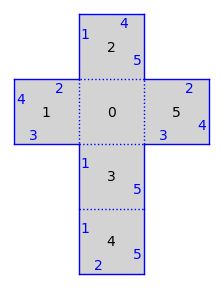

In [4]:
cube_surface.plot(figsize=4)

Sage-flatsurf represents a surface as a collection of polygons in the plane with edge identifications. Above you see a standard *net* for the cube. A *net* is what you get when you cut along edges until the surface can be flattened into the plane. The labels on the boundary edges of the net tell you the label of the square the edge is glued to.

You can get the polygons making up the surface:

In [5]:
cube_surface.polygon(0)

Polygon(vertices=[(0, 0), (1, 0), (1, 1), (0, 1)])

Above we can see that polygon `0` is the unusual unit square $[0,1] \times [0,1]$.

A *geodesic* is a locally length-minimizing path. Away from the vertices (which are also called *singularities* of the surface), geodesics follow straight lines. So, we also call them *straight-line paths*. To construct a straight-line path, you need to start with a tangent vector. For example: the following constructs the tangent vector based at the center of square `0` and traveling in direction $(2, 1)$.

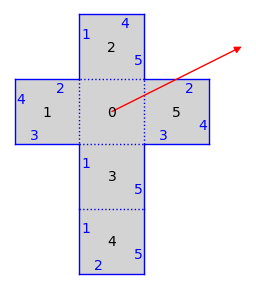

In [6]:
tangent_vector = cube_surface.tangent_vector(0, (1/2, 1/2), (2, 1))
cube_surface.plot(figsize=4) + tangent_vector.plot(color='red')

Note that if we follow the straight line, we pass through the top of edge $5$. Then we'll follow the identification between the sides and enter polygon $2$. To draw this path, we need to convert the tangent vector into a *straight line trajectory*:

In [7]:
trajectory = tangent_vector.straight_line_trajectory()

When we start, the trajectory just travels across the initial polygon:

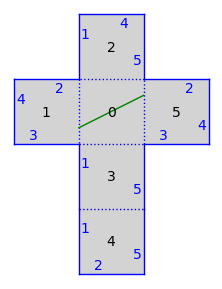

In [8]:
cube_surface.plot(figsize=4) + trajectory.plot(color='green')

We can allow the path to move across the next two edges and then plot again:

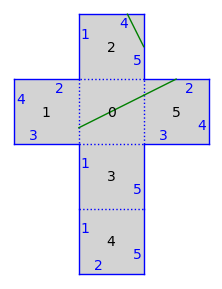

In [9]:
trajectory.flow(2)
cube_surface.plot(figsize=4) + trajectory.plot(color='green')

It will now move across the top edge of $2$ and enter square $4$. We flow it for a while:

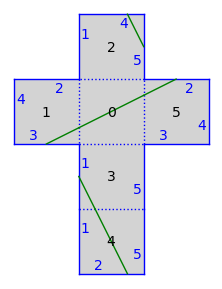

In [10]:
trajectory.flow(20)
cube_surface.plot(figsize=4) + trajectory.plot(color='green')

It looks like the path closed up after visiting each square once. You can tell it closed by asking `trajectory`:

In [11]:
trajectory.is_closed()

True

It consists of six maximal segments in the squares making up the surface:

In [12]:
trajectory.combinatorial_length()

6

Using the `mapping` object that was returned using the `platonic_cube()` method, we can draw the path on the cube.

In [13]:
G = cube.plot(frame=False, point=False, line=False, wireframe=None, color='lightgrey')
G += line3d(mapping(trajectory), radius=0.02, frame=False, color='green')
G

Graphics3d Object

Here is another example that we flow forward and backward. We use slope $\frac{3}{5}$ leaving the center:

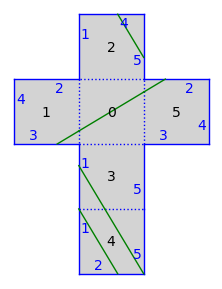

In [14]:
tangent_vector2 = cube_surface.tangent_vector(0, (1/2, 1/2), (5, 3))
trajectory2 = tangent_vector2.straight_line_trajectory()
trajectory2.flow(20)  # Flow forward.
trajectory2.flow(-20) # Also flow backward.
cube_surface.plot(figsize=4) + trajectory2.plot(color='green')

Note that the above trajectory hits two corners of polygon $4$. A straight-line path joining singularities is called a *saddle connection.*

In [15]:
print(trajectory2.is_saddle_connection())
print(trajectory2.combinatorial_length())

True
7


In [16]:
G = cube.plot(frame=False, point=False, line=False, wireframe=None, color='lightgrey')
G += line3d(mapping(trajectory2), radius=0.02, frame=False, color='green')
G

Graphics3d Object

Here is a result about paths leaving the center of a cube:

**Theorem.** Let $\gamma$ be a maximal straight-line path of rational slope $\frac{p}{q}$ leaving the center of a face of the cube. Assume $\frac{p}{q}$ is a ratio of integers with no common factor. 

1. If $p$ and $q$ are both odd, then $\gamma$ is a saddle connection with combinatorial length $p+q-1$.
2. Otherwise, $\gamma$ is closed and has combinatorial length $2 (p+q)$ or $4(p+q)$.

We demonstrate both examples for bigger $p$ and $q$:

True True


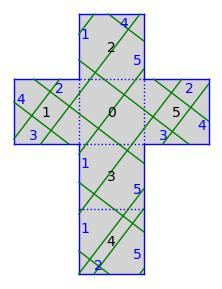

Graphics3d Object

In [17]:
p = 17
q = 13
tangent_vector3 = cube_surface.tangent_vector(0, (1/2, 1/2), (q, p))
trajectory3 = tangent_vector3.straight_line_trajectory()
trajectory3.flow(p+q)  # Flow forward.
trajectory3.flow(-(p+q)) # Also flow backward.

print(trajectory3.is_saddle_connection(), trajectory3.combinatorial_length()==p+q-1)

show(cube_surface.plot(figsize=4) + trajectory3.plot(color='green'))

G = cube.plot(frame=False, point=False, line=False, wireframe=None, color='lightgrey')
G += line3d(mapping(trajectory3), radius=0.02, frame=False, color='green')
G

True
Combinatorial length is 4*(p+q) = 148.


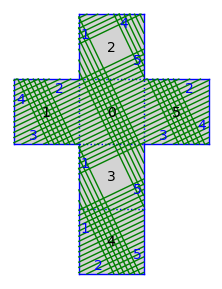

Graphics3d Object

In [18]:
p = 12
q = 25
tangent_vector4 = cube_surface.tangent_vector(0, (1/2, 1/2), (q, p))
trajectory4 = tangent_vector4.straight_line_trajectory()
trajectory4.flow(2*(p+q))    # Flow forward.
trajectory4.flow(-2*(p+q))   # Also flow backward.

print(trajectory4.is_closed())
if trajectory4.combinatorial_length()==2*(p+q):
    print('Combinatorial length is 2*(p+q).')
elif trajectory4.combinatorial_length()==4*(p+q):
    print(f'Combinatorial length is 4*(p+q) = {4*(p+q)}.')
else:
    print('The statement on combinatorial length is incorrect.')

show(cube_surface.plot(figsize=4) + trajectory4.plot(color='green'))

G = cube.plot(frame=False, point=False, line=False, wireframe=None, color='lightgrey')
G += line3d(mapping(trajectory4), radius=0.02, frame=False, color='green')
G

## The dodecahedron

In [19]:
from flatsurf.geometry.polyhedra import platonic_dodecahedron

polyhedron, s, mapping = platonic_dodecahedron()

polyhedron.plot(frame=False)

Graphics3d Object

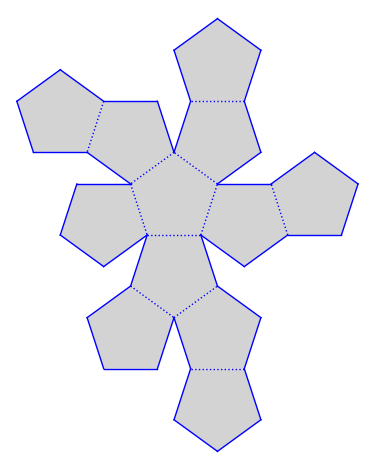

In [20]:
s.plot(polygon_labels=False, edge_labels=False)

In [`2019` David Aulicino and Jayadev Athreya observed](https://www.tandfonline.com/doi/full/10.1080/00029890.2019.1538475) that there is a closed saddle connection on the Dodecahedron. Here *closed* means that it starts and ends at the same singularity. This trajectory is drawn below.

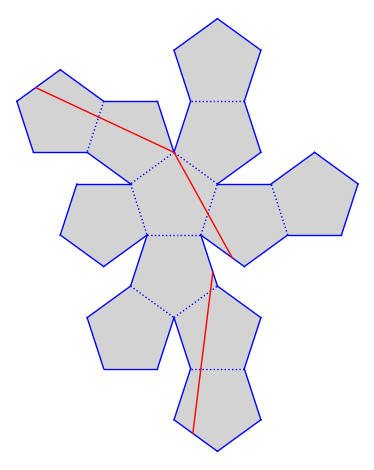

In [21]:
a = s.base_ring().gen()
v = vector(s.base_ring(), [-3*a^2 + 12, -5*a^3 + 19*a])
tv = s.tangent_vector(0, s.polygon(0).vertex(3), v)
traj = tv.straight_line_trajectory()
traj.flow(6)
s.plot(polygon_labels=False, edge_labels=False) + traj.plot(color='red')

In [22]:
G = polyhedron.plot(frame=False, point=False, line=False, wireframe=None, color='lightgrey')
G += line3d(mapping(traj), radius=0.02, frame=False, color='green')
G

Graphics3d Object

Furthermore, it was previously observed (in works of D. and E. Fuchs, Davis, Dods, Traub, and Yang; see the [citations of this article](https://www.tandfonline.com/doi/full/10.1080/00029890.2019.1538475)) that none of the other platonic solids have a closed saddle connection. (The other platonic solids are the cube, tetrahedron, octahedron, and icosahedron.) So:

**Theorem (Athreya - Aulicino, 2019):** The only platonic solid with a closed saddle connection is the dodecahedron.

I plan to come back to this idea later...

## Other polyhedra

In `Sage` we can create a polyhedron by providing its vertices. For example:

In [23]:
vertices = [
    vector(QQ, (  1,  0, 0)), 
    vector(QQ, (  0,  1, 0)), 
    vector(QQ, ( -1,  0, 0)), 
    vector(QQ, (  0, -1, 0)), 
    vector(QQ, (  0,  0, 2))
]
pyramid = Polyhedron(vertices=vertices)
pyramid.plot(frame=False)

Graphics3d Object

Import a method to convert a polyhedron into a flat surface. The method returns both the surface and a mapping that can be used to send straight-line paths to the polyhedron:

In [24]:
from flatsurf.geometry.polyhedra import polyhedron_to_cone_surface

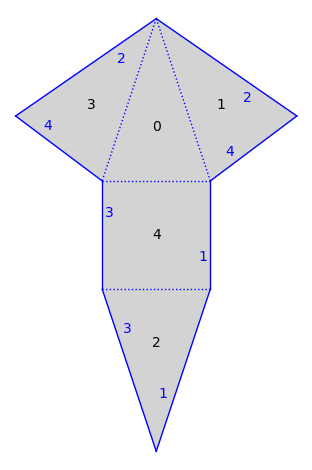

In [25]:
# The square in the pyramid has side-length sqrt(2), so we scale by 1/sqrt(2):
pyramid_surface, pyramid_mapping = polyhedron_to_cone_surface(pyramid, scaling_factor=AA(1/sqrt(2)))
pyramid_surface.plot()

Lets do something similar. Polygon $4$ is the square. We get the square's planar representation:

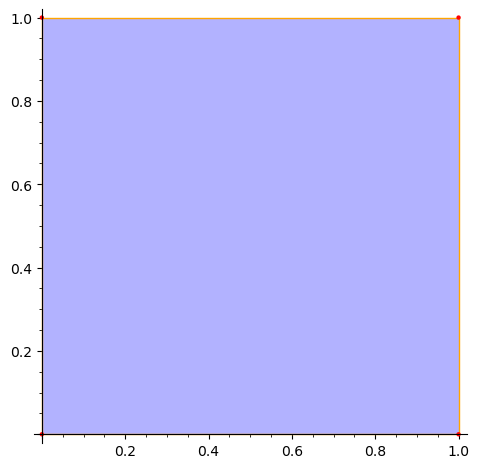

In [26]:
pyramid_surface.polygon(4).plot()

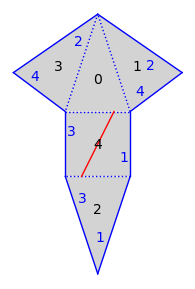

In [27]:
tangent_vector = pyramid_surface.tangent_vector(4, (1/2, 1/2), (2, -1))
trajectory = tangent_vector.straight_line_trajectory()
pyramid_surface.plot(figsize=4) + trajectory.plot(color='red')

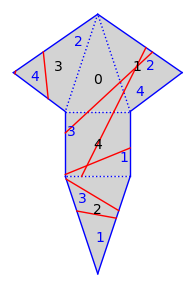

Graphics3d Object

In [28]:
trajectory.flow(10)
show(pyramid_surface.plot(figsize=4) + trajectory.plot(color='red'))
G = pyramid.plot(frame=False, point=False, line=False, wireframe=None, color='lightgrey')
G += line3d(pyramid_mapping(trajectory), radius=0.02, frame=False, color='red')
G

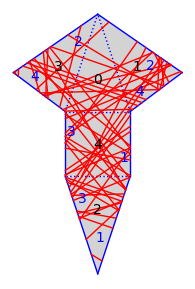

Graphics3d Object

In [29]:
trajectory.flow(100)
show(pyramid_surface.plot(figsize=4) + trajectory.plot(color='red'))
G = pyramid.plot(frame=False, point=False, line=False, wireframe=None, color='lightgrey')
G += line3d(pyramid_mapping(trajectory), radius=0.02, frame=False, color='red')
G

I'm not sure what this trajectory does. It seems unlikely to be periodic or to be a saddle connection. One big difficulty is that the path possibly travels in a dense set of directions has a dense set of slopes. This is in contrast to the cube, where once a trajectory starts, it can only travel in at most four directions in any given square (at most two slopes). This is because the total angles at the cone singularities are rational multiples of $\pi$ (and because the polyhedron is a topological sphere).

## An infinite example

Pavel Javornik is a former City College of New York student (graduated in 2020). We now have a joint [preprint](https://arxiv.org/abs/2310.03115) studying the &ldquo;Necker cube surface&rdquo;.

I will include some code for working with this surface. Pardon the complexity!

In [30]:
from flatsurf.geometry.straight_line_trajectory import StraightLineTrajectory


class SurfaceToSpaceMapping(SageObject):
    def __init__(self, similarity_surface, transformation):
        self._s = similarity_surface
        from types import FunctionType

        if isinstance(transformation, FunctionType):
            self.transformation = transformation

    def transformation(self, label):
        r"""
        Return a pair (m, t) where m is a 3x2 matrix and t is a vector with 3 entries.

        The associated transformation from the polygon with the given label
        is v mapsto m*v + t where v is a point in the polygon.
        """
        return self._t[label]

    def image_polygon(self, label):
        r"""
        Return a 2-dimensional polyhedron in 3-space representing
        the image of the polygon with the given label.
        """
        p = self._s.polygon(label)
        m, t = self.transformation(label)
        vertices = [m * v + t for v in p.vertices()]
        return Polyhedron(vertices=vertices)

    def plot(
        self,
        labels,
        point=False,
        line=False,
        polygon=None,
        wireframe=None,
        frame=False,
        label_to_color=None,
    ):
        r"""
        Return a 3d plot of the polygonal images in 3-space
        corresponding to the collection of labels.

        The other parameters are passed to a Polyhedron.plot method
        and affect the rendering.
        """
        it = iter(labels)
        label = next(it)
        if label_to_color is None:
            p = self.image_polygon(label).plot(
                point=point,
                line=line,
                polygon=polygon,
                wireframe=wireframe,
                frame=frame,
                color="pink",
            )
        else:
            p = self.image_polygon(label).plot(
                point=point,
                line=line,
                polygon=polygon,
                wireframe=wireframe,
                frame=frame,
                color=label_to_color(label),
            )
        for label in it:
            if label_to_color is None:
                p += self.image_polygon(label).plot(
                    point=point,
                    line=line,
                    polygon=polygon,
                    wireframe=wireframe,
                    frame=frame,
                    color="pink",
                )
            else:
                p += self.image_polygon(label).plot(
                    point=point,
                    line=line,
                    polygon=polygon,
                    wireframe=wireframe,
                    frame=frame,
                    color=label_to_color(label),
                )
        from sage.modules.free_module_element import vector

        p.frame_aspect_ratio(
            tuple(vector(p.bounding_box()[1]) - vector(p.bounding_box()[0]))
        )
        return p

    def __call__(self, o):
        r"""
        This method is used to convert from an object on the surface to an object in space.

        Currently works with

        - ``StraightLineTrajectory`` -- returns the corresponding list of points in space
        - ``SegmentInPolygon`` -- returns the corresponding pair of points in space
        - ``SimilaritySurfaceTangentVector`` -- returns a pair of points corresponding
          to the image point and image of the tangent vector.
        """
        if isinstance(o, StraightLineTrajectory):
            points = []
            it = iter(o.segments())
            s = next(it)
            label = s.polygon_label()
            m, t = self.transformation(label)
            points.append(t + m * s.start().point())
            points.append(t + m * s.end().point())
            for s in it:
                label = s.polygon_label()
                m, t = self.transformation(label)
                points.append(t + m * s.end().point())
            return points
        if isinstance(o, SegmentInPolygon):
            # Return the pair of images of the endpoints.
            label = o.polygon_label()
            m, t = self.transformation(label)
            return (t + m * o.start().point(), t + m * o.end().point())
        if isinstance(o, SimilaritySurfaceTangentVector):
            # Map to a pair of vectors consisting of the image
            # of the basepoint and the image of the vector.
            label = o.polygon_label()
            m, t = self.transformation(label)
            point = o.point()
            vector = o.vector()
            return (t + m * point, m * vector)
        raise ValueError("Failed to recognize type of passed object")

In [31]:
from flatsurf.geometry.surface import OrientedSimilaritySurface
from flatsurf.geometry.categories import ConeSurfaces
from flatsurf.geometry.polygon import Polygon


class CubeSurf(OrientedSimilaritySurface):
    def __init__(self, F):
        self._faceA = Polygon(vertices=[(0, 0), (1, 0), (1, 1), (0, 1)], base_ring=F)
        self._faceB = Polygon(vertices=[(0, 0), (1, 0), (1, 1), (0, 1)], base_ring=F)
        self._faceC = Polygon(vertices=[(0, 0), (1, 0), (1, 1), (0, 1)], base_ring=F)
        super().__init__(
            F,
            category=ConeSurfaces()
            .Rational()
            .InfiniteType()
            .WithoutBoundary()
            .Connected(),
        )

    def is_mutable(self):
        return False

    def is_compact(self):
        return False

    def roots(self):
        return ((0, 0, IntegerModRing(3)(0)),)

    def is_translation_surface(self, positive=True):
        return False

    def is_dilation_surface(self, positive=False):
        return False

    def __eq__(self, other):
        if not isinstance(other, CubeSurf):
            return False

        return self.base_ring() is other.base_ring()

    def __hash__(self):
        return hash(self.base_ring())

    def polygon(self, label):
        x, y, l = label
        if l == 0:
            return self._faceA
        if l == 1:
            return self._faceB
        if l == 2:
            return self._faceC

    def opposite_edge(self, label, edge):
        x, y, l = label
        # l(0) = A, l(1) = B, l(2) = C
        if l == 0:
            if edge == 0:
                return ((x, y - 1, l + 2), 2)
            if edge == 1:
                return ((x, y, l + 1), 3)
            if edge == 2:
                return ((x, y, l + 2), 0)
            if edge == 3:
                return ((x - 1, y, l + 1), 1)
        if l == 1:
            if edge == 0:
                return ((x + 1, y - 1, l + 1), 3)
            if edge == 1:
                return ((x + 1, y, l + 2), 3)
            if edge == 2:
                return ((x, y, l + 1), 1)
            if edge == 3:
                return ((x, y, l + 2), 1)
        if l == 2:
            if edge == 0:
                return ((x, y, l + 1), 2)
            if edge == 1:
                return ((x, y, l + 2), 2)
            if edge == 2:
                return ((x, y + 1, l + 1), 0)
            if edge == 3:
                return ((x - 1, y + 1, l + 2), 0)


In [32]:
s = CubeSurf(QQ)

In [33]:
MM = matrix(QQ, [[0, 1, 0], [-1, 0, 0], [0, 0, 1]])


def transformation(label):
    M = MatrixSpace(QQ, 3, 2)
    V = VectorSpace(QQ, 3)
    x, y, l = label
    if l == 0:
        return MM * M([[1, 0], [0, 1], [0, 0]]), MM * V([x, y, -x - y])
    elif l == 1:
        return MM * M([[0, 0], [0, 1], [-1, 0]]), MM * V([x + 1, y, -x - y])
    else:  # l == 2
        return MM * M([[1, 0], [0, 0], [0, -1]]), MM * V([x, y + 1, -x - y])


m = SurfaceToSpaceMapping(s, transformation)


def label_to_color(label):
    if label[2] == 0:
        return "pink"
    if label[2] == 1:
        return "yellow"
    if label[2] == 2:
        return "beige"

A portion of the Necker cube surface is depicted below:

In [34]:
from itertools import islice

m.plot(set(islice(s.labels(), 50)), label_to_color=label_to_color)

Graphics3d Object

The surface consists of squares, meeting at $3$ or $6$ to a vertex.

Here is a path of slope $-1$ on the surface.

In [35]:
B = s.tangent_bundle()
v = B(s.root(), (1 / 4, 1 / 4), (-1, 1))
traj = v.straight_line_trajectory()
traj.flow(100)
if traj.is_closed():
    print("The trajectory closed up.")
labels = [seg.polygon_label() for seg in traj.segments()]
m.plot(labels, label_to_color=label_to_color) + line3d(m(traj), radius=0.02)

The trajectory closed up.


Graphics3d Object

A trajectory of slope $11/9$:

In [36]:
v = B(s.root(), (1 / 3, 1 / 4), (9, 11))
traj = v.straight_line_trajectory()
traj.flow(1000)
while not traj.is_closed():
    traj.flow(1000)
labels = [seg.polygon_label() for seg in traj.segments()]
p = m.plot(labels, label_to_color=label_to_color)
p += line3d(m(traj), radius=0.04)
p

Graphics3d Object

In an infinite periodic surface, there is also the possibility that a straight-line path be *drift periodic*, meaning that it is periodic up to a non-trivial translation of the surface. Here is an example:

In [37]:
v = B(s.root(), (1 / 3, 1 / 4), (4, 5))
traj = v.straight_line_trajectory()
traj.flow(50)
labels = [seg.polygon_label() for seg in traj.segments()]
p = m.plot(labels, label_to_color=label_to_color) + line3d(
    m(traj), radius=0.04, label_to_color=label_to_color
)
p.frame_aspect_ratio(tuple(vector(p.bounding_box()[1]) - vector(p.bounding_box()[0])))
p

Graphics3d Object

**Theorem (Javornik).** Suppose $\gamma$ is a maximal straight-line path on the Necker cube surface that does not hit any singularities. Let $m \in \mathbb R$ be its slope measured within any square. Then:

1. The path is closed if and only if $m=\frac{p}{q}$ for two odd integers $p$ and $q$.
2. The path is drift periodic if and only if $m=\frac{p}{q}$ for integers $p$ and $q$, one of which is even and the other of which is odd.

Another closed example:

In [38]:
v = B(s.root(), (1 / 3, 1 / 4), (19, 21))
traj = v.straight_line_trajectory()
traj.flow(1000)
while not traj.is_closed():
    traj.flow(1000)
labels = [seg.polygon_label() for seg in traj.segments()]
p = m.plot(labels, label_to_color=label_to_color)
p += line3d(m(traj), radius=0.04)
p

Graphics3d Object

Here are some examples of closed straight-line paths, whose slopes are given by odd ratios of consecutive Fibonacci numbers:
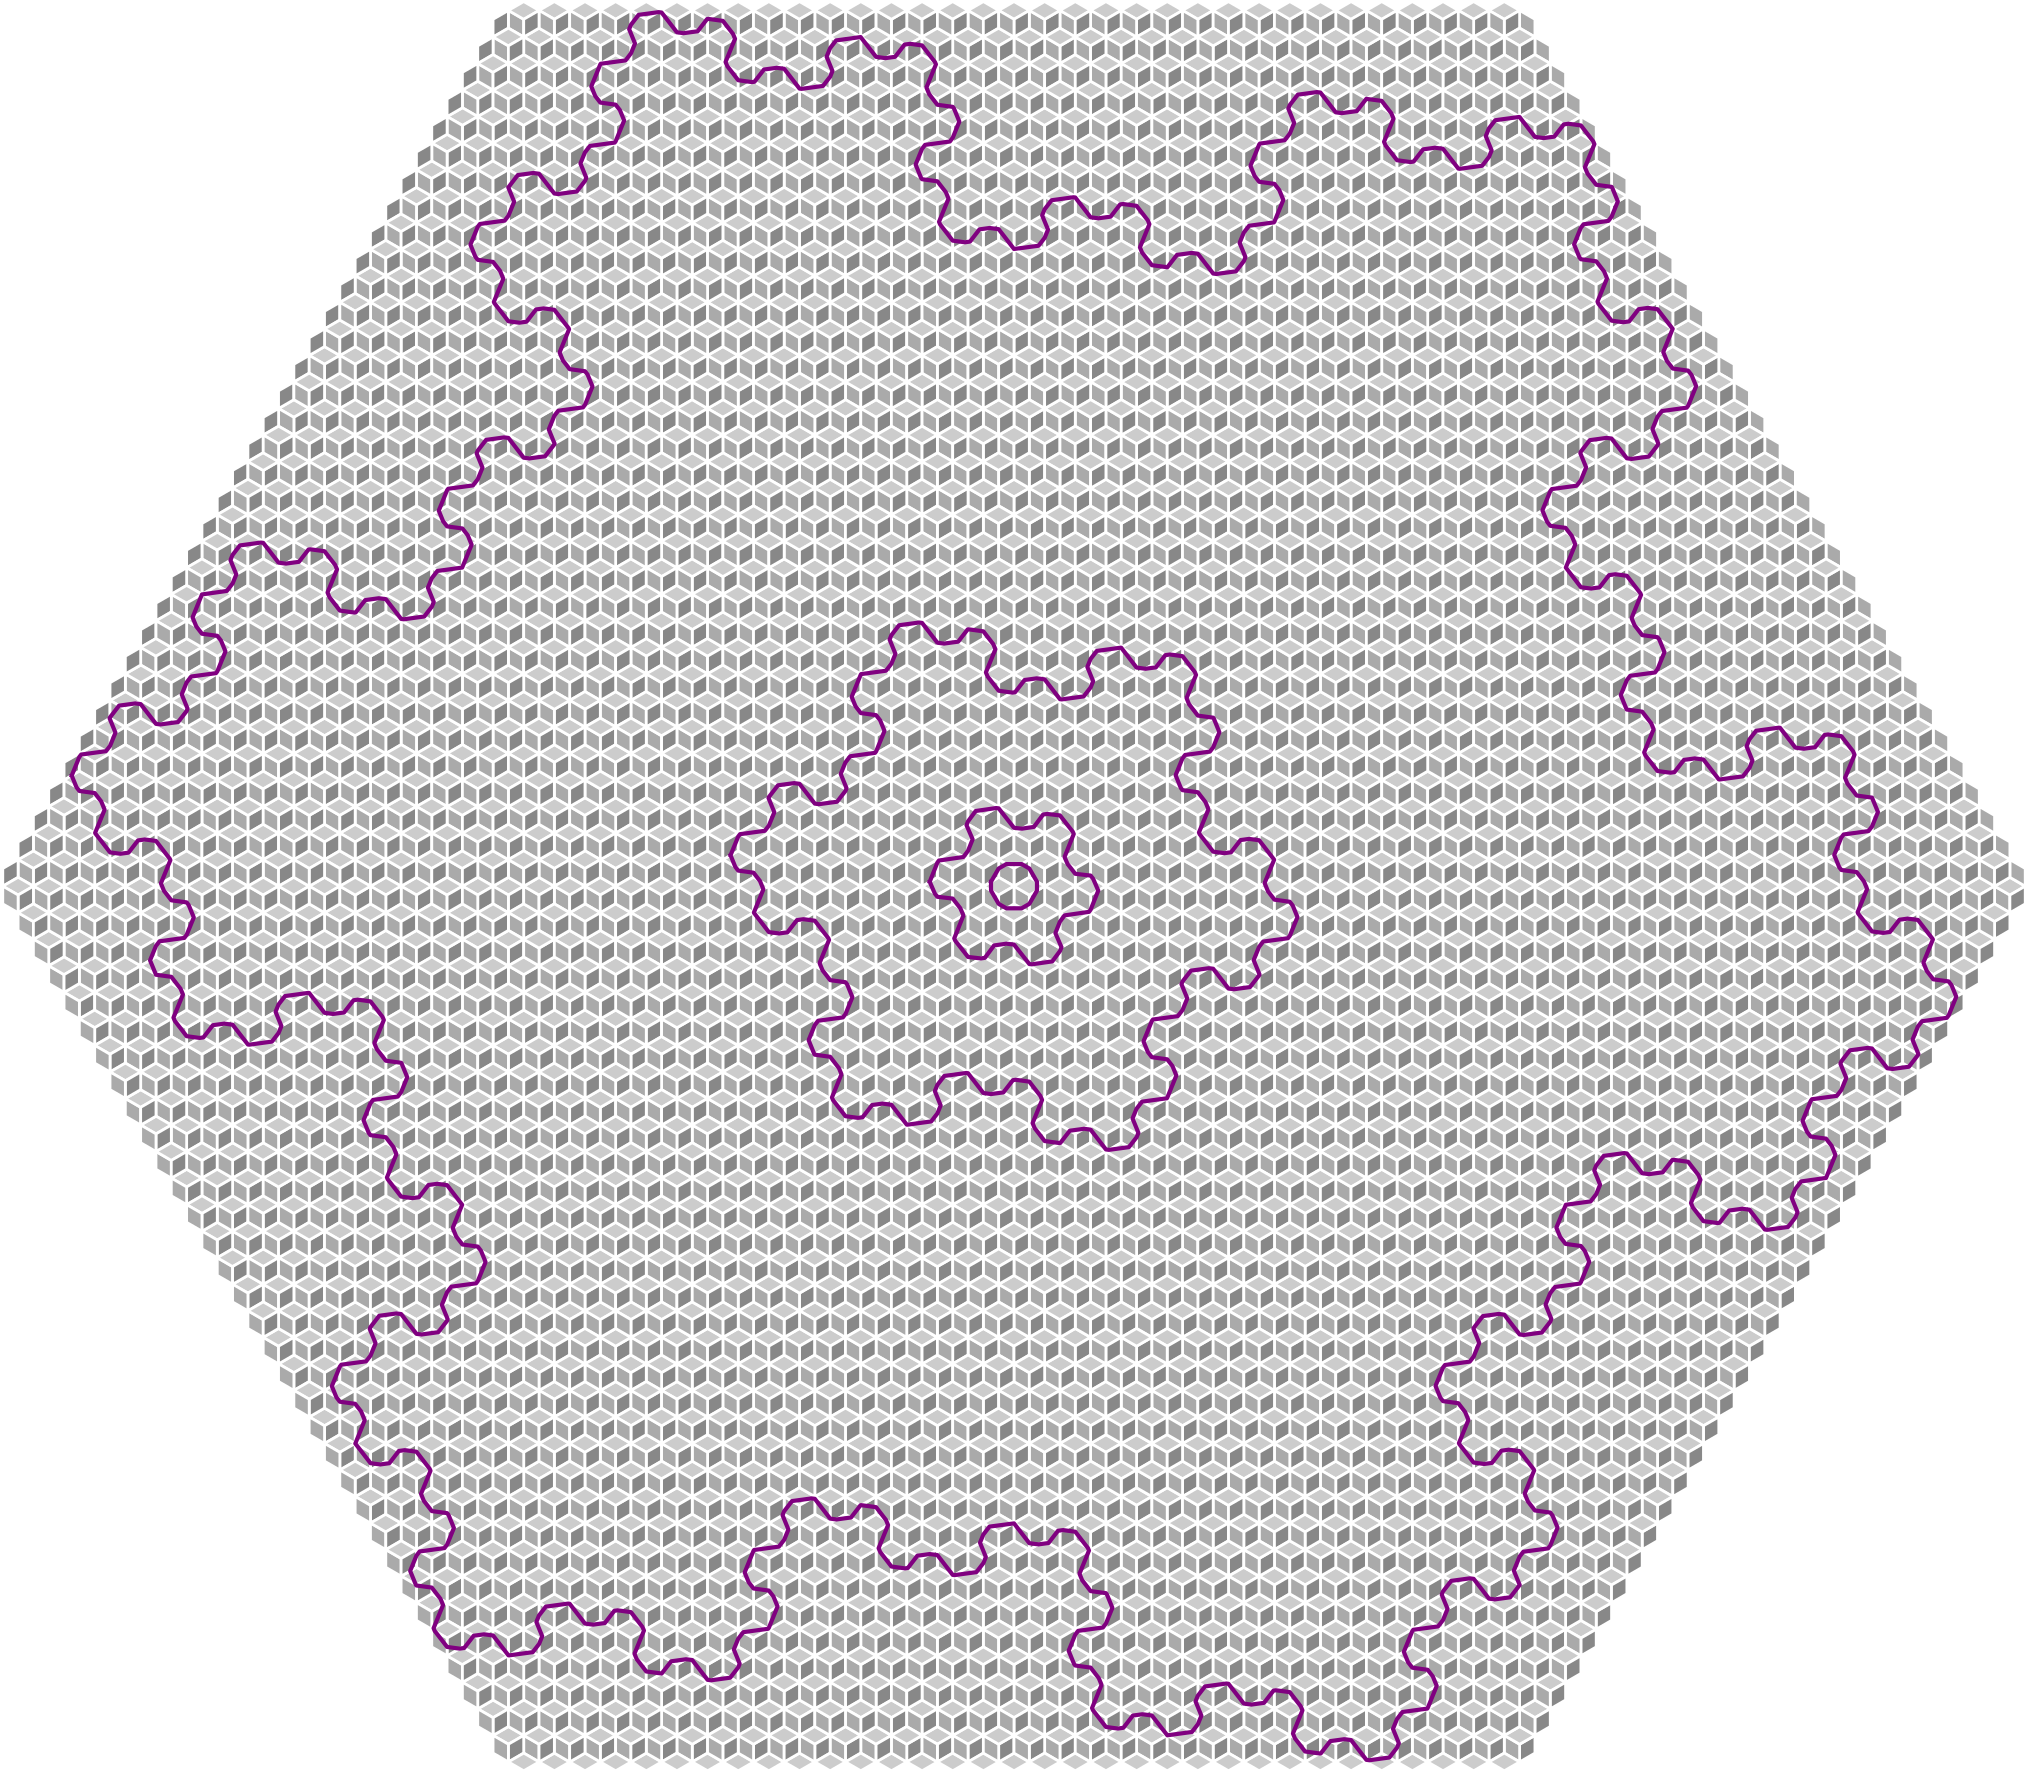

## Building surfaces from polygons

We can use `polygons` class allows us to define common polygons. For example:

In [39]:
from flatsurf import polygons

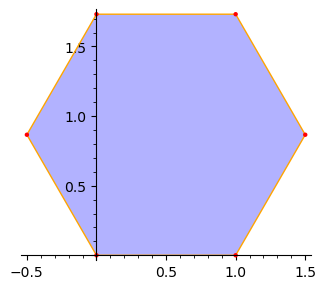

In [40]:
p0 = polygons.regular_ngon(6, AA)
show(p0.plot(), figsize=4)

The class `MutableOrientedSimilaritySurface` allows us to construct polygons by gluing edges of polygons.

In [41]:
from flatsurf import MutableOrientedSimilaritySurface

In [42]:
surface = MutableOrientedSimilaritySurface(AA)

In [43]:
surface.add_polygon(p0, label=0)

0

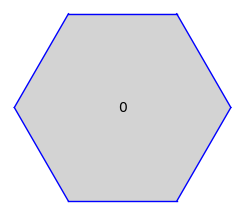

In [44]:
surface.plot(figsize=3)

We will add a rectangle:

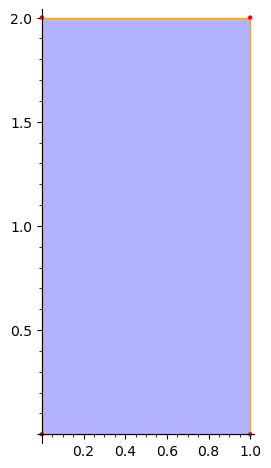

In [45]:
p1 = polygons.rectangle(1, 2, base_ring=AA)
p1.plot()

In [46]:
surface.add_polygon(p1, label=1)

1

The surface doesn't know how to glue the edges, we must specify them:

In [47]:
surface

Disconnected Surface built from a rectangle and a regular hexagon

We must specify the gluings. Edges of a polygon are indexed from $0$ to $n-1$ counterclockwise. The edge vectors (which go between consecutive vertices) can be accessed and printed as below:

In [48]:
for e, v in enumerate(p0.edges()):
    print(f'The vector of edge {e} of p0 is {v}')
print()
for e, v in enumerate(p1.edges()):
    print(f'The vector of edge {e} of p1 is {v}')

The vector of edge 0 of p0 is (1, 0)
The vector of edge 1 of p0 is (1/2, 0.866025403784439?)
The vector of edge 2 of p0 is (-1/2, 0.866025403784439?)
The vector of edge 3 of p0 is (-1, 0)
The vector of edge 4 of p0 is (-1/2, -0.866025403784439?)
The vector of edge 5 of p0 is (1/2, -0.866025403784439?)

The vector of edge 0 of p1 is (1, 0)
The vector of edge 1 of p1 is (0, 2)
The vector of edge 2 of p1 is (-1, 0)
The vector of edge 3 of p1 is (0, -2)


Here we carry out the edge gluings:

In [49]:
surface.glue((0, 0), (1, 2)) # Glue polygon 0, edge 0 to polygon 1 edge 2
surface.glue((0, 1), (0, 4)) # Glue polygon 0, edge 1 to polygon 0 edge 4
surface.glue((0, 2), (0, 5)) # Glue polygon 0, edge 2 to polygon 0 edge 5
surface.glue((0, 3), (1, 0)) # Glue polygon 0, edge 3 to polygon 1 edge 0
surface.glue((1, 1), (1, 3)) # Glue polygon 1, edge 1 to polygon 1 edge 3

In [50]:
surface

Translation Surface built from a rectangle and a regular hexagon

We constructed a *translation surface*. This means that edges have all been glued by translations. We make it so that we can no longer make changes to the surface.

In [51]:
surface.set_immutable()

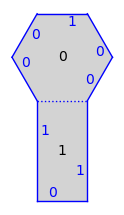

In [52]:
surface.plot(figsize=3)

One nice thing about translation surfaces is that a straight-line path always moves in the same direction. For example:

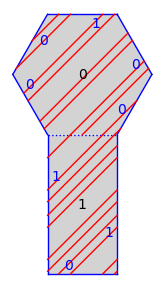

In [53]:
tangent_vector = surface.tangent_vector(0, (1/2, 0), (1, 1))
trajectory = tangent_vector.straight_line_trajectory()
trajectory.flow(20)  # Flow forward.
surface.plot(figsize=4) + trajectory.plot(color='red')

## The matrix action on translation surfaces

There is an action of a matrix on translation surfaces built by polygons. The easiest example to understand is the square torus, which is built by gluing together opposite sides of a square:

In [54]:
torus = flatsurf.translation_surfaces.square_torus()
torus

Translation Surface in H_1(0) built from a square

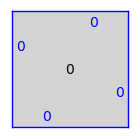

In [55]:
torus.plot(figsize=2)

Let $M$ be a $2 \times 2$ matrix whose determinant is non-zero. Then $M$ induces a linear map of the plane. We can apply $M$ to each polygon in a translation surface. Then we can glue edges in the same way by translation. This works because linear maps of the plane send parallel lines to parallel lines and preserve the ratios of lengths of parallel segments.

For example, consider $M=\left(\begin{array}{rr}
1 & \frac{1}{2} \\
0 & 1
\end{array}\right)$, which is a horizontal shear.

In [56]:
M = matrix([
    [1, 1/2],
    [0, 1]
])

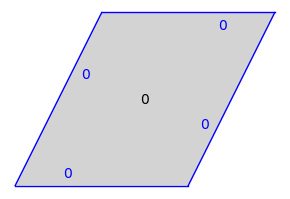

In [57]:
new_torus = M*torus
new_torus.plot(figsize=3)

Note that sometimes, we get the square torus back, up to cutting and regluing polygons along identified edges. For example, consider the shear
$A=\left(\begin{array}{rr}
1 & 1 \\
0 & 1
\end{array}\right)$.

In [58]:
A = matrix([
    [1, 1],
    [0, 1]
])

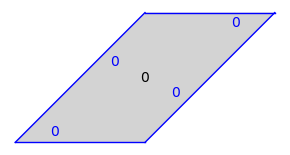

In [59]:
new_torus = A*torus
new_torus.plot(figsize=3)

We make a copy we can change:

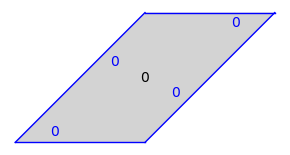

In [60]:
new_torus_copy = MutableOrientedSimilaritySurface.from_surface(new_torus)
new_torus_copy.plot(figsize=3)

Now we cut the quadrilateral along one of the diagonals:

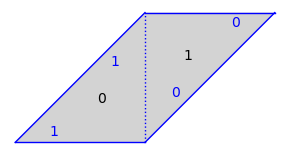

In [61]:
new_torus_copy.subdivide_polygon(0, 1, 3)
new_torus_copy.plot(figsize=3)

Viewing the surface a bit differently gives the square torus back:

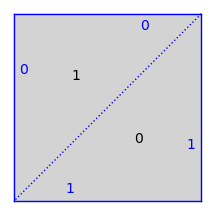

In [62]:
gs = new_torus_copy.graphical_surface()
gs.make_adjacent(0, 1)
gs.plot(figsize=3)

There is a standard version of a translation surface available:

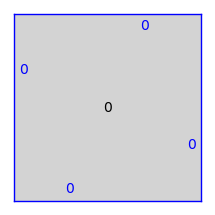

In [63]:
new_torus_canonicalized = new_torus.canonicalize()
new_torus_canonicalized.plot(figsize=3)

So, we can check that a matrix action fixes a surface with:

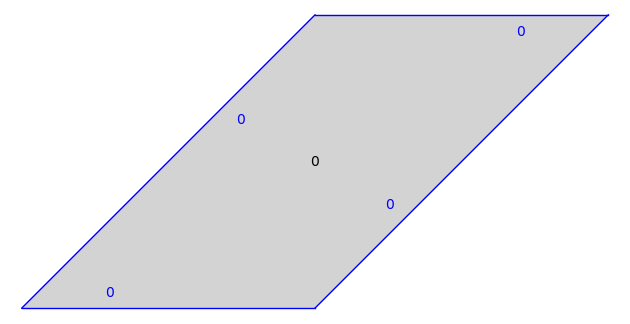

In [64]:
(A*torus).plot()

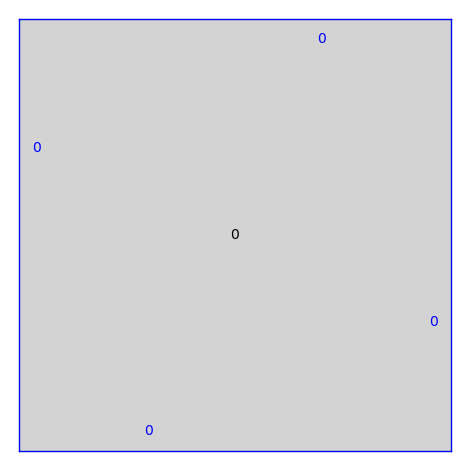

In [65]:
(A*torus).canonicalize().plot()

In [66]:
torus.canonicalize() == (A*torus).canonicalize()

True

The *Veech group* of a surface $s$ is the group of matrices $M$ that satisfy $M\cdot s = s$. This is a group, because:

1. If $M\cdot s = s$, then $M^{-1} \cdot s = s$, because:
$$ M^{-1} \cdot s = M^{-1} \cdot (M \cdot s) = (M^{-1} \cdot M) \cdot s = I \cdot s = s.$$
2. If $M_1 \cdot s = s$ and $M_2 \cdot s = s$, then $(M_2 \cdot M_1) \cdot s = s$, because:
$$(M_2 \cdot M_1) \cdot s = M_2 \cdot (M_1 \cdot s) = M_2 \cdot s = s.$$

**Example.** The Veech group of the square torus is the group consisting of all integer $2 \times 2$ matrices of determinant $\pm 1$.

In [67]:
M = matrix([
    [-7, 9], 
    [-4, 5]
])
M.det()

1

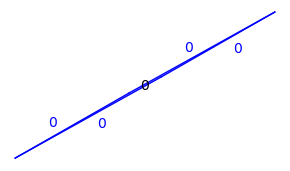

In [68]:
(M*torus).plot(figsize=3)

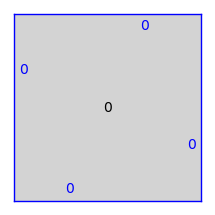

In [69]:
(M*torus).canonicalize().plot(figsize=3)

## Veech groups and cylinders in translation surfaces

The following transaltion surface is built by gluing together two regular pentagons:

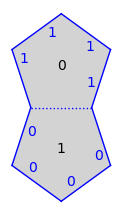

In [70]:
s = flatsurf.translation_surfaces.veech_double_n_gon(5).canonicalize()
s.plot(figsize=3)

There is an obvious rotation by $\frac{\pi}{5}$ in the Veech group. This symmetry swaps the two pentagons.

In [71]:
R = matrix(s.base_ring(), [
    [ cos(pi/5), -sin(pi/5) ],
    [ sin(pi/5),  cos(pi/5) ]
])

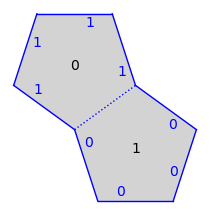

In [72]:
(R*s).plot(figsize=3)

Here we check that this matrix is in the Veech group:

In [73]:
(R*s).canonicalize() == s

True

We can find another very different symmetry as well.

A closed straight-line path in a translation surface can be deformed, changing the starting point but not the direction. The only obstacle is that if you deform too much, the path hits a singularity. The union of closed paths obtained in this way is called a *cylinder*: It is a subset isometric to an open Euclidean cylinder.

Here is an example:

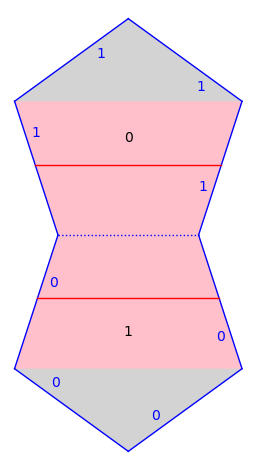

In [74]:
tv1 = s.tangent_vector(0, (0, 1/2), (1,0))
traj1 = tv1.straight_line_trajectory()
traj1.flow(1)
cyl1 = traj1.cylinder()
s.plot() + traj1.plot(color='red') + cyl1.plot(color='pink')

This surface has a second cylinder in the same direction:

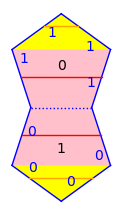

In [75]:
tv2 = s.tangent_vector(0, (1/2, 4/3), (1,0))
traj2 = tv2.straight_line_trajectory()
traj2.flow(1)
cyl2 = traj2.cylinder()
s.plot(figsize=3) + traj1.plot(color='red') + cyl1.plot(color='pink') + traj2.plot(color='orange') + cyl2.plot(color='yellow')

The *inverse modulus* of a cylinder is the ratio
$$\frac{\textrm{circumference}}{\textrm{height}}=\frac{(\textrm{circumference})^2}{\textrm{area}}.$$

In [76]:
for i,cyl in enumerate([cyl1, cyl2]):
    cir = cyl.circumference()
    area = cyl.area()
    inv_mod = cir^2/area
    print(f'Cylinder {i+1} has circumference {RDF(cir):.4f}, area {RDF(area):.4f}, and inverse modulus {RDF(inv_mod):.4f}')

Cylinder 1 has circumference 2.6180, area 2.4899, and inverse modulus 2.7528
Cylinder 2 has circumference 1.6180, area 0.9511, and inverse modulus 2.7528


In [77]:
inv_mod

2.752763840942347?

The two horizontal cylinders have the same inverse modulus `inv_mod`. Consider the matrix `M` that shears by this amount:

In [78]:
M = matrix(s.base_ring(), [
    [ 1, inv_mod ],
    [ 0,       1 ]
])
show('M = ', M, ' = ', matrix(AA, M))

'M = ' [      1 2/5*a^3]
[      0       1] ' = ' [                 1 2.752763840942347?]
[                 0                  1]

This matrix is in the Veech group of `s`:

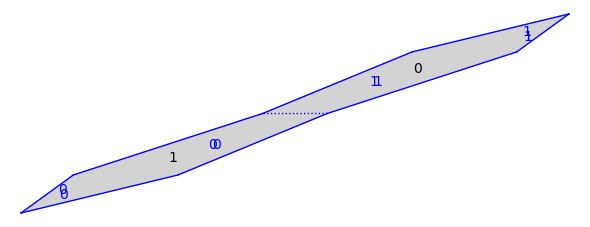

In [79]:
(M*s).plot(figsize=6)

In [80]:
(M * s).canonicalize() == s.canonicalize()

True

This is an example of a general fact:

**Definition:** The *direction* of a cylinder is the direction closed straight-line paths in the cylinder travel. We call two cylinders *parallel* if they have the same direction. A *cylinder decomposition* of a translation surface is a collection of disjoint parallel cylinders and parallel saddle connections that cover the surface.

**Lemma (Thurston):** If a translation surface has a decomposition into cylinders in direction $\theta$ (measured counterclockwise from the horizontal) and $x$ is an integer multiple of each inverse modulus, then the matrix
$$R_\theta \cdot \left(\begin{array}{rr}
1 & x \\
0 & 1
\end{array}\right) \cdot R_\theta^{-1}$$
is in the Veech group.